In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('/Users/ankit/Desktop/Springboard dox/Python/2018_less.csv',low_memory=False)


In [2]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Columns: 150 entries, id to settlement_term
dtypes: float64(63), int64(57), object(30)
memory usage: 11.4+ MB
None


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,145217616,NaN,10000,10000,10000,36 months,10.33%,324.23,B,B1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,145248657,NaN,4000,4000,4000,36 months,23.4%,155.68,E,E1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,145638579,NaN,5000,5000,5000,36 months,17.97%,180.69,D,D1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,145592722,NaN,23000,23000,23000,60 months,20.89%,620.81,D,D4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,144858623,NaN,8000,8000,8000,36 months,23.4%,311.35,E,E1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(df.shape)

(9998, 150)


In [4]:
#Drop columns with data NaN

In [5]:
df=df.dropna(axis=1)

In [6]:
df.shape

(9998, 89)

In [7]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,...,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,145217616,10000,10000,10000,36 months,10.33%,324.23,B,B1,MORTGAGE,...,4,91.3,0,0,367828,61364,20900,54912,N,N
1,145248657,4000,4000,4000,36 months,23.4%,155.68,E,E1,RENT,...,9,95.0,0,0,98655,66926,21900,71555,N,N
2,145638579,5000,5000,5000,36 months,17.97%,180.69,D,D1,MORTGAGE,...,0,100.0,0,0,136927,11749,13800,10000,N,N
3,145592722,23000,23000,23000,60 months,20.89%,620.81,D,D4,RENT,...,3,100.0,0,0,7500,976,3300,0,N,N
4,144858623,8000,8000,8000,36 months,23.4%,311.35,E,E1,OWN,...,2,100.0,1,0,199744,31078,2300,32206,N,N


In [8]:
#rename the column names

df = df.rename(columns={"loan_amnt": "loan_amount", "funded_amnt": "funded_amount", "funded_amnt_inv": "investor_funds",
                       "int_rate": "interest_rate", "annual_inc": "annual_income"})


In [9]:
df.head()
print(type(df['interest_rate'][0]))

<class 'str'>


In [10]:
#removing percentage sign from the interest_rate
df.interest_rate = df.interest_rate.str.replace('%', '')
print(df.interest_rate.head())

0    10.33
1     23.4
2    17.97
3    20.89
4     23.4
Name: interest_rate, dtype: object


In [11]:
#remove months from term colums
df.term = df.term.str.replace('months', '')
df.term.head()

0    36 
1    36 
2    36 
3    60 
4    36 
Name: term, dtype: object

In [12]:
#selecting unique column as index

df['id'].is_unique

True

In [13]:
df.set_index('id')

,loan_amount,funded_amount,investor_funds,term,interest_rate,installment,grade,sub_grade,home_ownership,annual_income,...,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
id,,,,,,,,,,,,,,,,,,,,,
145217616,10000,10000,10000,36,10.33,324.23,B,B1,MORTGAGE,280000.0,...,4,91.3,0,0,367828,61364,20900,54912,N,N
145248657,4000,4000,4000,36,23.4,155.68,E,E1,RENT,90000.0,...,9,95.0,0,0,98655,66926,21900,71555,N,N
145638579,5000,5000,5000,36,17.97,180.69,D,D1,MORTGAGE,59280.0,...,0,100.0,0,0,136927,11749,13800,10000,N,N
145592722,23000,23000,23000,60,20.89,620.81,D,D4,RENT,68107.0,...,3,100.0,0,0,7500,976,3300,0,N,N
144858623,8000,8000,8000,36,23.4,311.35,E,E1,OWN,43000.0,...,2,100.0,1,0,199744,31078,2300,32206,N,N
145606176,32075,32075,32075,60,11.8,710.26,B,B4,MORTGAGE,150000.0,...,2,100.0,0,0,360433,56635,20000,80125,N,N
145647242,9600,9600,9600,36,12.98,323.37,B,B5,MORTGAGE,35704.0,...,0,95.5,0,0,6500,748,4200,0,N,N
145631930,30000,30000,30000,60,18.94,777.23,D,D2,MORTGAGE,90000.0,...,6,95.0,1,0,372872,99468,15000,94072,N,N
145640422,2500,2500,2500,36,13.56,84.92,C,C1,RENT,55000.0,...,3,100.0,1,0,60124,16901,36500,18124,N,N


In [14]:
print(df.columns)
df.info()

Index(['id', 'loan_amount', 'funded_amount', 'investor_funds', 'term',
       'interest_rate', 'installment', 'grade', 'sub_grade', 'home_ownership',
       'annual_income', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'total_bal_il',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'total_r

Text(0.5, 1.0, 'Total committed by Investors')

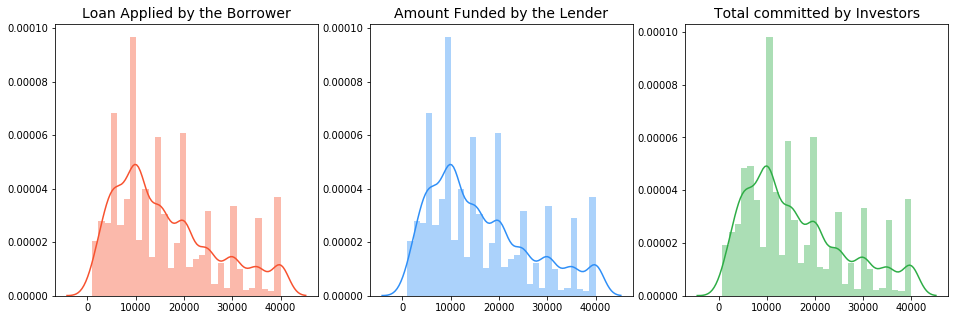

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

loan_amount = df["loan_amount"].values
funded_amount = df["funded_amount"].values
investor_funds = df["investor_funds"].values


sns.distplot(loan_amount, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=14)

In [18]:
df["loan_status"].value_counts()


Current               8666
Fully Paid             980
Late (31-120 days)     169
Charged Off             98
In Grace Period         65
Late (16-30 days)       19
Default                  1
Name: loan_status, dtype: int64

In [19]:
# Determining the loans that are bad from loan_status column

bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", 
            "Late (16-30 days)", "Late (31-120 days)"]


df['loan_condition'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
    
df['loan_condition'] = df['loan_status'].apply(loan_condition)

[Text(0, 0.5, '(%)')]

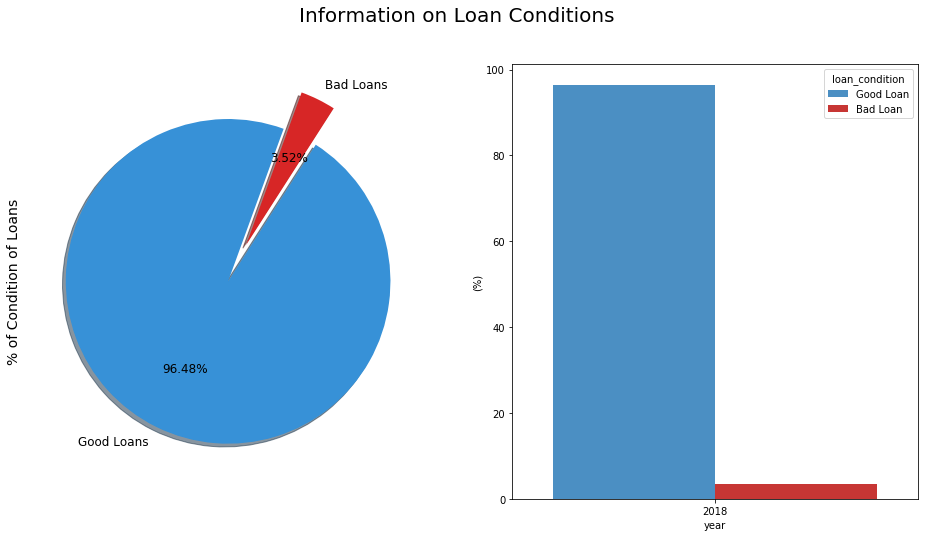

In [20]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"

plt.suptitle('Information on Loan Conditions', fontsize=20)

df["loan_condition"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#3791D7", "#E01E1B"]

sns.barplot(x="year", y="loan_amount", hue="loan_condition", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")

In [23]:
df['income_category'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['annual_income'] <= 100000, 'income_category'] = 'Low'
    col.loc[(col['annual_income'] > 100000) & (col['annual_income'] <= 200000), 'income_category'] = 'Medium'
    col.loc[col['annual_income'] > 200000, 'income_category'] = 'High'

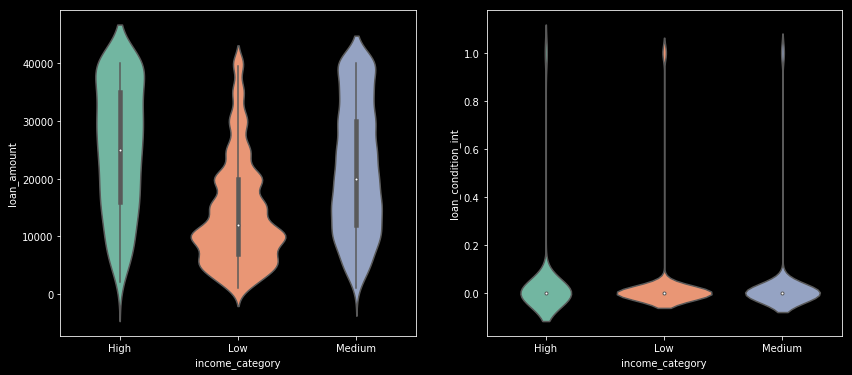

In [26]:
# Let's transform the column loan_condition into integrers.

lst = [df]
df['loan_condition_int'] = np.nan

for col in lst:
    col.loc[df['loan_condition'] == 'Good Loan', 'loan_condition_int'] = 0 # Negative (Bad Loan)
    col.loc[df['loan_condition'] == 'Bad Loan', 'loan_condition_int'] = 1 # Positive (Good Loan)
    
# Convert from float to int the column (This is our label)  
df['loan_condition_int'] = df['loan_condition_int'].astype(int)
fig, (ax1, ax2)= plt.subplots(nrows=1, ncols=2, figsize=(14,6))

# Change the Palette types tomorrow!

sns.violinplot(x="income_category", y="loan_amount", data=df, palette="Set2", ax=ax1 )
sns.violinplot(x="income_category", y="loan_condition_int", data=df, palette="Set2", ax=ax2)
